In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [95]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [27]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn= engine.connect()

In [7]:
# Declare a Base using `automap_base()`
Base= automap_base()
Base.prepare(autoload_with=engine)

# Use the Base class to reflect the database tables
Base.classes.keys()

['station', 'measurement']

In [8]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [9]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement= Base.classes.measurement
Station=Base.classes.station

In [14]:
# Create a session
session= Session(engine)

# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.

recent_date= session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.

dt.date(2017,8,23)- dt.timedelta(days=365)

datetime.date(2016, 8, 23)

In [31]:
# Perform a query to retrieve the data and precipitation scores
# Sort by date

prcp_data= session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > '2016-08-23').\
            order_by(Measurement.date).all()
prcp_data

[('2016-08-24', 2.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 57.9),
 ('2016-08-24', None),
 ('2016-08-24', 31.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 36.8),
 ('2016-08-25', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 5.3),
 ('2016-08-25', 1.5),
 ('2016-08-25', 2.8),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.8),
 ('2016-08-26', 0.5),
 ('2016-08-26', 1.0),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.3),
 ('2016-08-27', 0.0),
 ('2016-08-27', 4.6),
 ('2016-08-27', 0.5),
 ('2016-08-27', 0.0),
 ('2016-08-27', 3.0),
 ('2016-08-27', None),
 ('2016-08-28', 0.3),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 15.2),
 ('2016-08-28', 52.6),
 ('2016-08-29', 0.0),
 ('2016-08-29', 4.3),
 ('2016-08-29', 1.0),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 8.9),
 ('2016-08-29', 22.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.5),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 1.3),

In [77]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df= pd.DataFrame(prcp_data, columns= ['Date','Precipitation'])
prcp_df.fillna(value=0, inplace=True)
prcp_df['Precipitation'].astype(int)
prcp_df

,Date,Precipitation
0,2016-08-24,2.0
1,2016-08-24,54.6
2,2016-08-24,57.9
3,2016-08-24,0.0
4,2016-08-24,31.0
...,...,...
2218,2017-08-22,12.7
2219,2017-08-23,0.0
2220,2017-08-23,0.0
2221,2017-08-23,2.0


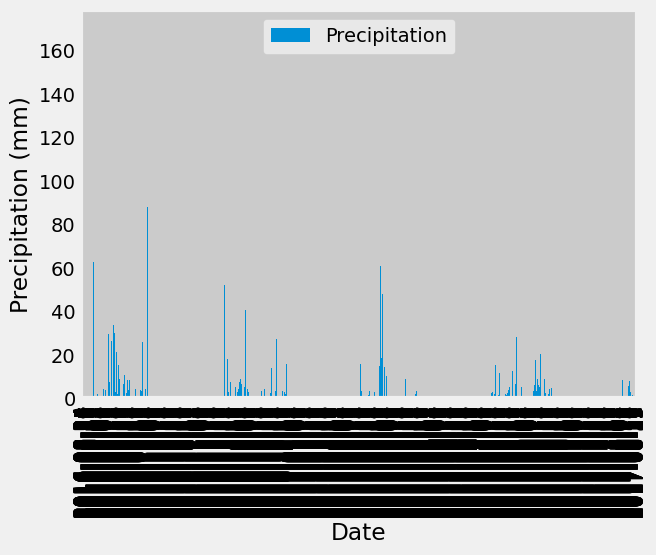

In [90]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot.bar('Date','Precipitation')
plt.ylabel('Precipitation (mm)')
plt.show()

In [86]:
# Use Pandas to calculate the summary statistics for the precipitation data

prcp_df.describe()

,Precipitation
count,2223.000000
mean,4.065452
std,11.206335
min,0.000000
25%,0.000000
50%,0.300000
75%,2.800000
max,170.200000


# Exploratory Station Analysis

In [92]:
# Design a query to calculate the total number of stations in the dataset

session.query(Station.station).count()

9

In [167]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

stations=session.query(Measurement.station,func.count()).group_by(Measurement.station)\
                        .order_by(func.count().desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [186]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

active_station= session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                             filter(Measurement.station=='USC00519281').all()
active_station

[(12.2, 29.4, 22.03582251082252)]

In [196]:
# Saving temperature observations for last 12 months for active station into dataframe

temp= session.query(Measurement.date,Measurement.tobs).filter(Measurement.date > '2016-08-23')\
                            .filter(Measurement.station=='USC00519281').all()
temp_df= pd.DataFrame(temp, columns=['Date','Temperature'])
temp_df

,Date,Temperature
0,2016-08-24,25.0
1,2016-08-25,26.7
2,2016-08-26,26.7
3,2016-08-27,23.9
4,2016-08-28,22.8
...,...,...
346,2017-08-14,25.0
347,2017-08-15,25.0
348,2017-08-16,24.4
349,2017-08-17,24.4


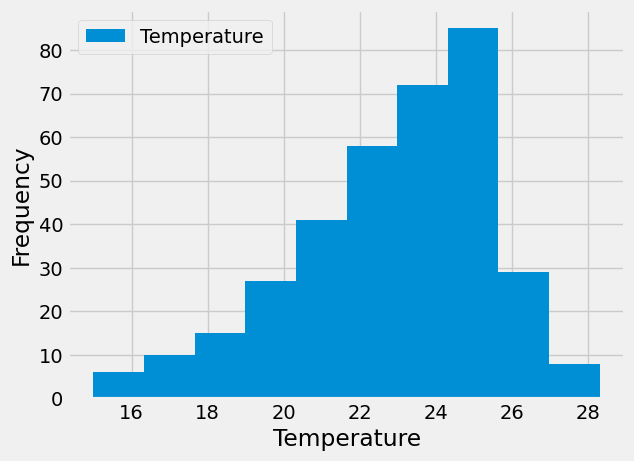

In [202]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_df.plot.hist()
plt.xlabel('Temperature')
plt.show()

# Close Session

In [203]:
# Close Session
session.close()
